# 자기 분석 프로젝트: 데이터 정제 및 시각화 코드 by 임은지

### 데이터 1 : 긍정/부정 시트
### 데이터 2 : 감정 세분화 시트 

## 데이터 1
### 1. 불러오기

In [1]:
import pandas as pd

In [2]:
diary = pd.read_csv("C:/Users/eunji_see/data/diary_raw.csv")

In [3]:
diary.head()

,연도,긍정(긍정적인 감정상태),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,부정(부정적인 감정상태)
0,2007.0,박물관이 살아있다(영화) 줌머씨이야기(책) 감자탕 재밌게 즐기자 선도부 합격 3학년...,NaN,NaN,NaN,NaN,NaN,책 좀 읽자 국어도 못하는 주제에 국어 점수 올리자 열공 중2 마지막 수업 개학이 ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008.0,아침에 일어나 기지개를 펴고 거울을 보고 스트레칭하고 씻고 바로 아침 먹으러 고고 ...,NaN,NaN,NaN,NaN,NaN,1월 너무 빨리 지나갔다 한 달 동안 뭘 했지 정말 지루해 하지만 이것도 언젠가 과...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009.0,기회는 대담히 부딪히는 사람에게만 주어진다 이제 독서실에서 열공하는거야 혼자서도 할...,NaN,NaN,NaN,NaN,NaN,강의 듣기 귀찮다 내가 완벽주의자였으면 좋겠다 고부도 막 열심히 하고 끝까지 끈질기...


### 2. 필요없는 열/행 제거하기
1) 열 제거

In [4]:
diary = diary.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)

In [5]:
diary.head()

,연도,긍정(긍정적인 감정상태),부정(부정적인 감정상태)
0,2007.0,박물관이 살아있다(영화) 줌머씨이야기(책) 감자탕 재밌게 즐기자 선도부 합격 3학년...,책 좀 읽자 국어도 못하는 주제에 국어 점수 올리자 열공 중2 마지막 수업 개학이 ...
1,NaN,NaN,NaN
2,2008.0,아침에 일어나 기지개를 펴고 거울을 보고 스트레칭하고 씻고 바로 아침 먹으러 고고 ...,1월 너무 빨리 지나갔다 한 달 동안 뭘 했지 정말 지루해 하지만 이것도 언젠가 과...
3,NaN,NaN,NaN
4,2009.0,기회는 대담히 부딪히는 사람에게만 주어진다 이제 독서실에서 열공하는거야 혼자서도 할...,강의 듣기 귀찮다 내가 완벽주의자였으면 좋겠다 고부도 막 열심히 하고 끝까지 끈질기...


2) 행 제거

In [6]:
diary = diary.drop([1,3,5,7,9,11,13,15,17,19,21])

In [7]:
diary.head()

,연도,긍정(긍정적인 감정상태),부정(부정적인 감정상태)
0,2007.0,박물관이 살아있다(영화) 줌머씨이야기(책) 감자탕 재밌게 즐기자 선도부 합격 3학년...,책 좀 읽자 국어도 못하는 주제에 국어 점수 올리자 열공 중2 마지막 수업 개학이 ...
2,2008.0,아침에 일어나 기지개를 펴고 거울을 보고 스트레칭하고 씻고 바로 아침 먹으러 고고 ...,1월 너무 빨리 지나갔다 한 달 동안 뭘 했지 정말 지루해 하지만 이것도 언젠가 과...
4,2009.0,기회는 대담히 부딪히는 사람에게만 주어진다 이제 독서실에서 열공하는거야 혼자서도 할...,강의 듣기 귀찮다 내가 완벽주의자였으면 좋겠다 고부도 막 열심히 하고 끝까지 끈질기...
6,2010.0,고3 수험생 고딩 마지막으로 쓰는 다이어리 부자는 가장 많이 가진 사람이 아니라 가...,기말고사 문제집 도착 방학이다 2학년 마지막 아팠다 가방을 어떻게 하면 좋을까 모의...
8,2011.0,항상 책을 지니고 다니겠다 항상 메모하고 자주 글을 쓰겠다 배려와 양보심이 많은 사...,목표가 점점 시들시들해지고 있다 이제 책 읽을 시간도 없으면 어떡해 졸업식 풋풋한 ...


### 3. 긍정/부정 별 단어수를 나타내는 열 만들기

In [8]:
def find_number(word):
    if pd.isnull(word):
        return ""
    else:
        return len(word.split())  # 공백()을 기준으로 문자를 나누고(split) 그 문자의 수(len)를 세라. 
       
diary['긍정단어수'] = diary['긍정(긍정적인 감정상태)'].apply(find_number)
diary['부정단어수'] = diary['부정(부정적인 감정상태)'].apply(find_number)

긍정/부정 단어수가 표시된 열이 생성됨.

In [9]:
diary

,연도,긍정(긍정적인 감정상태),부정(부정적인 감정상태),긍정단어수,부정단어수
0,2007.0,박물관이 살아있다(영화) 줌머씨이야기(책) 감자탕 재밌게 즐기자 선도부 합격 3학년...,책 좀 읽자 국어도 못하는 주제에 국어 점수 올리자 열공 중2 마지막 수업 개학이 ...,333,418
2,2008.0,아침에 일어나 기지개를 펴고 거울을 보고 스트레칭하고 씻고 바로 아침 먹으러 고고 ...,1월 너무 빨리 지나갔다 한 달 동안 뭘 했지 정말 지루해 하지만 이것도 언젠가 과...,382,332
4,2009.0,기회는 대담히 부딪히는 사람에게만 주어진다 이제 독서실에서 열공하는거야 혼자서도 할...,강의 듣기 귀찮다 내가 완벽주의자였으면 좋겠다 고부도 막 열심히 하고 끝까지 끈질기...,312,226
6,2010.0,고3 수험생 고딩 마지막으로 쓰는 다이어리 부자는 가장 많이 가진 사람이 아니라 가...,기말고사 문제집 도착 방학이다 2학년 마지막 아팠다 가방을 어떻게 하면 좋을까 모의...,545,536
8,2011.0,항상 책을 지니고 다니겠다 항상 메모하고 자주 글을 쓰겠다 배려와 양보심이 많은 사...,목표가 점점 시들시들해지고 있다 이제 책 읽을 시간도 없으면 어떡해 졸업식 풋풋한 ...,1075,298
10,2012.0,광화문 교보문고 띵크커피 책 읽기 돈 열심히 벌기 보고싶은 영화 다보기 책과 함께 ...,벌써 6월 장학금 지루하기 짝이 없던 하루 최악의 경험 대장약 병자야 토익 점수 벌...,818,317
12,2013.0,삶의 목적 방향 존재 이유 아침형 인간 운동 질문 끊임없이 나에게 묻기 친구들과 신...,알바 마지막 아쉬움 욕구를 이기지 못한 날 나에게 졌다 잡 생각 버리기 정말 모르겠...,1326,510
14,2014.0,벨기안 친구가 해주는 음식 처음 먹어보았다 다들 이쁘고 멋있고 정말 재밌었다 신나고...,약속을 어겼고 살은 찌고 이러다 복부 비만 되는거 아니야 너무 덥다 더위가 지나갔으...,1083,729
16,2015.0,인터스텔라 첫 여행 바다가 너무너무 보고싶었다 동해 짙고 푸른 동해바다 창문으로 바...,들키고 싶지 않은 드러내기 싫은 부분을 드러내야만 하는 상황이 닥쳤다 정말 싫다 어...,418,536
18,2016.0,최종 합격 welcome to H&M H&M belongs to me 계약서 작성 ...,영원한 것은 없는 법 나의 죽음보다 두려운 것은 타인의 죽음을 맞이하는 것 목격하는...,282,164


### 4.짝수 형태로 되어있는 인덱스 번호 초기화

In [10]:
diary = diary.reset_index(drop=True)

In [11]:
diary

,연도,긍정(긍정적인 감정상태),부정(부정적인 감정상태),긍정단어수,부정단어수
0,2007.0,박물관이 살아있다(영화) 줌머씨이야기(책) 감자탕 재밌게 즐기자 선도부 합격 3학년...,책 좀 읽자 국어도 못하는 주제에 국어 점수 올리자 열공 중2 마지막 수업 개학이 ...,333,418
1,2008.0,아침에 일어나 기지개를 펴고 거울을 보고 스트레칭하고 씻고 바로 아침 먹으러 고고 ...,1월 너무 빨리 지나갔다 한 달 동안 뭘 했지 정말 지루해 하지만 이것도 언젠가 과...,382,332
2,2009.0,기회는 대담히 부딪히는 사람에게만 주어진다 이제 독서실에서 열공하는거야 혼자서도 할...,강의 듣기 귀찮다 내가 완벽주의자였으면 좋겠다 고부도 막 열심히 하고 끝까지 끈질기...,312,226
3,2010.0,고3 수험생 고딩 마지막으로 쓰는 다이어리 부자는 가장 많이 가진 사람이 아니라 가...,기말고사 문제집 도착 방학이다 2학년 마지막 아팠다 가방을 어떻게 하면 좋을까 모의...,545,536
4,2011.0,항상 책을 지니고 다니겠다 항상 메모하고 자주 글을 쓰겠다 배려와 양보심이 많은 사...,목표가 점점 시들시들해지고 있다 이제 책 읽을 시간도 없으면 어떡해 졸업식 풋풋한 ...,1075,298
5,2012.0,광화문 교보문고 띵크커피 책 읽기 돈 열심히 벌기 보고싶은 영화 다보기 책과 함께 ...,벌써 6월 장학금 지루하기 짝이 없던 하루 최악의 경험 대장약 병자야 토익 점수 벌...,818,317
6,2013.0,삶의 목적 방향 존재 이유 아침형 인간 운동 질문 끊임없이 나에게 묻기 친구들과 신...,알바 마지막 아쉬움 욕구를 이기지 못한 날 나에게 졌다 잡 생각 버리기 정말 모르겠...,1326,510
7,2014.0,벨기안 친구가 해주는 음식 처음 먹어보았다 다들 이쁘고 멋있고 정말 재밌었다 신나고...,약속을 어겼고 살은 찌고 이러다 복부 비만 되는거 아니야 너무 덥다 더위가 지나갔으...,1083,729
8,2015.0,인터스텔라 첫 여행 바다가 너무너무 보고싶었다 동해 짙고 푸른 동해바다 창문으로 바...,들키고 싶지 않은 드러내기 싫은 부분을 드러내야만 하는 상황이 닥쳤다 정말 싫다 어...,418,536
9,2016.0,최종 합격 welcome to H&M H&M belongs to me 계약서 작성 ...,영원한 것은 없는 법 나의 죽음보다 두려운 것은 타인의 죽음을 맞이하는 것 목격하는...,282,164


### 5.연도 형식 바꾸기

실수(float) -> 정수(int)

In [12]:
diary['연도'].dtype

dtype('float64')

In [13]:
def make_int(number):
    return int(number)
diary['연도'] = diary['연도'].apply(make_int)

In [14]:
diary['연도'].dtype

dtype('int64')

## ----- 데이터 1 정제 완료 ------

### 1. 시각화 준비

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats

matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

### 2. 연도별 긍정/부정 단어수 
line 그래프 / bar 그래프 

<Figure size 720x288 with 0 Axes>

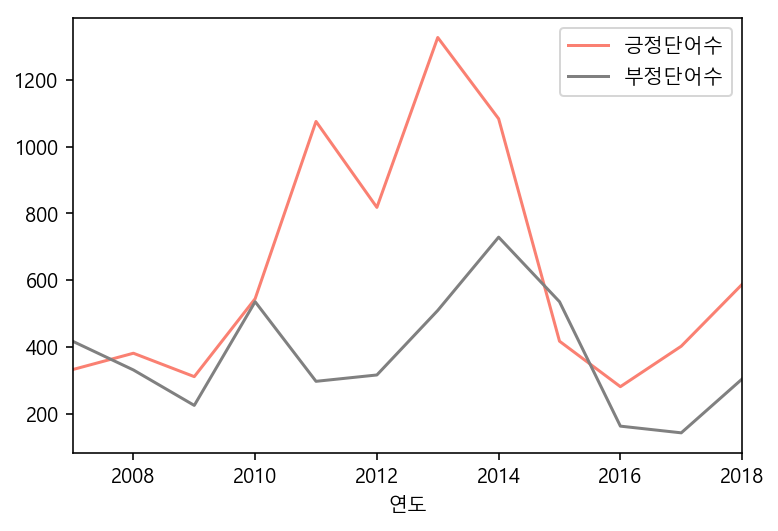

In [16]:
plt.figure(figsize=(10,4))
diary.plot(x="연도", y=['긍정단어수','부정단어수'], kind="line", color=['salmon','grey'])

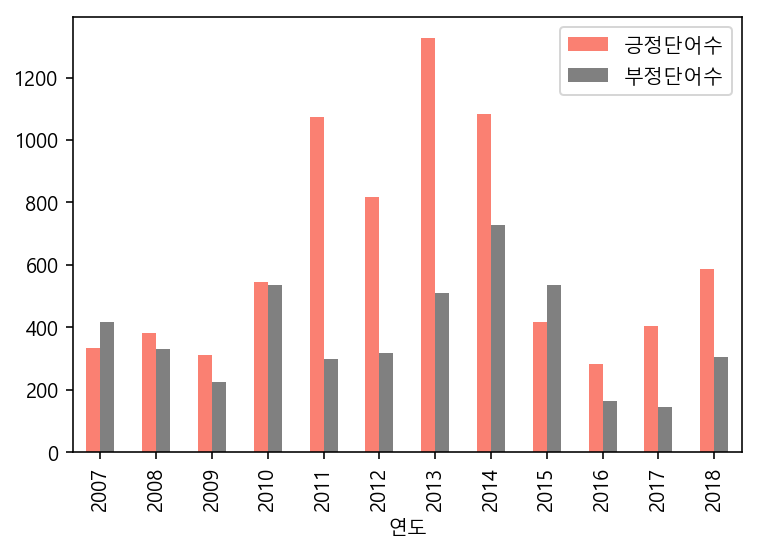

In [17]:
diary.plot(x="연도", y=['긍정단어수','부정단어수'], kind="bar", color=['salmon','grey'])

### 3. 긍정 단어가 전체에서 차지하는 비율


In [18]:
diary['긍정단어비율'] = diary['긍정단어수']/(diary['긍정단어수'] + diary['부정단어수'])

In [19]:
diary.긍정단어비율

0     0.443409
1     0.535014
2     0.579926
3     0.504163
4     0.782957
5     0.720705
6     0.722222
7     0.597682
8     0.438155
9     0.632287
10    0.736746
11    0.658455
Name: 긍정단어비율, dtype: float64

In [20]:
diary = diary.round({'긍정단어비율':2})

In [21]:
diary.긍정단어비율

0     0.44
1     0.54
2     0.58
3     0.50
4     0.78
5     0.72
6     0.72
7     0.60
8     0.44
9     0.63
10    0.74
11    0.66
Name: 긍정단어비율, dtype: float64

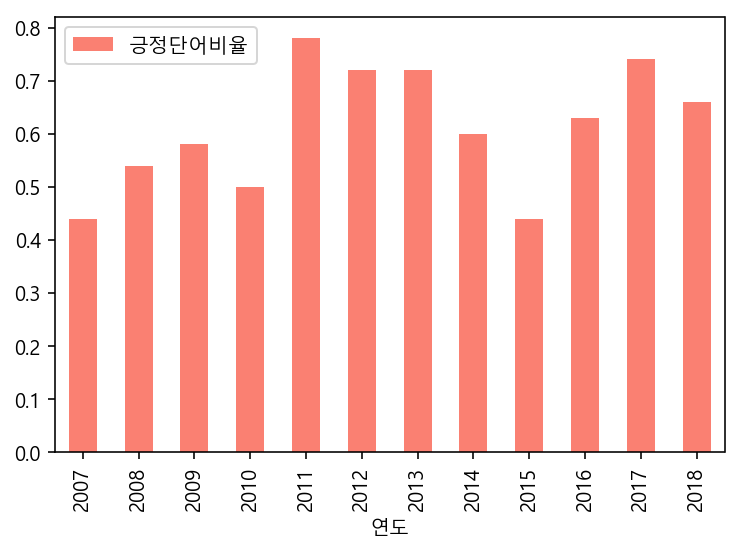

In [22]:
diary.plot(x="연도", y=['긍정단어비율'], kind="bar", color=['salmon'])

In [23]:
plt.rcParams['axes.facecolor'] = 'grey' # 그래프 배경색 바꿀 수 있음 (ppt 배경색 맞추는데 용이함)

<Figure size 432x288 with 0 Axes>

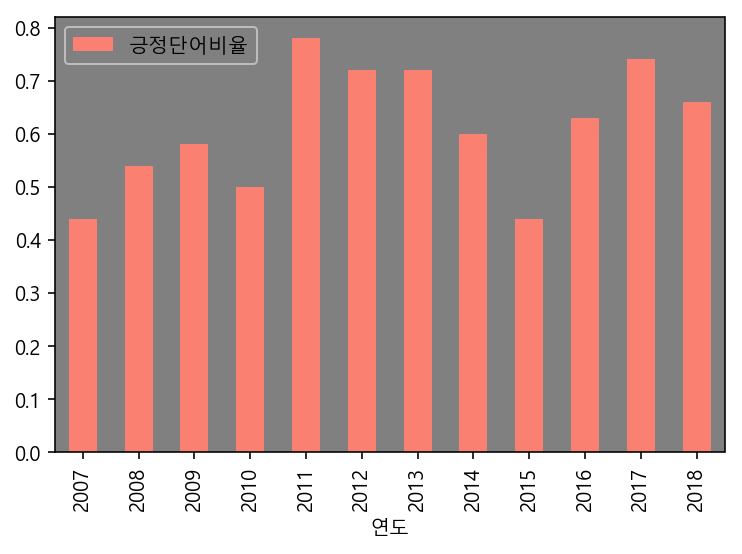

In [24]:
fig = plt.figure()

diary.plot(x="연도", y=['긍정단어비율'], kind="bar", color=['salmon'])

## 데이터 2 
### 1.불러오기

In [25]:
emotion = pd.read_csv("C:/Users/eunji_see/data/diary_emotion.csv", index_col = '연도')
emotion.head(3)

,즐거움/기쁨,행복,감동,설렘,응원/칭찬,감사,사랑,만족,욕망,불만족,...,두려움/불안,화남,반성,후회,슬픔/우울,괴로움,관리,가치관/지향점,관심/흥미,기타
연도,,,,,,,,,,,,,,,,,,,,,
2007-01,목욕탕,배드민턴,NaN,NaN,don't give up,고민해결,NaN,NaN,국어 점수,NaN,...,NaN,NaN,책 좀 읽자,NaN,NaN,NaN,공부,NaN,NaN,NaN
2007-01,감자탕,NaN,NaN,NaN,화이팅,예수님,NaN,NaN,여행,NaN,...,NaN,NaN,정신차려,NaN,NaN,NaN,영어 단어,NaN,NaN,NaN
2007-01,박물관이 살아있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,놀러가고싶다,NaN,...,NaN,NaN,게을러지지 말자,NaN,NaN,NaN,공부,NaN,NaN,NaN


In [26]:
emotion.tail(1)

,즐거움/기쁨,행복,감동,설렘,응원/칭찬,감사,사랑,만족,욕망,불만족,...,두려움/불안,화남,반성,후회,슬픔/우울,괴로움,관리,가치관/지향점,관심/흥미,기타
연도,,,,,,,,,,,,,,,,,,,,,
2019-02,데이터사이언스 가설 검증하는 과정이 너무나 매력적 연인의 동생 독서(유혹하는글쓰기)...,연인 생일 대화 통찰 현재와 미래를 연결짓는 역동성 책누리(연애의기억) 하남탐방 퇴사,영화(드래곤길들이기),데이터사이언스,나는 헛되게 살지 않았고 헛되게 일하지 않았다 진심을 담아 합리적으로 일할 수 있도...,NaN,NaN,NaN,데이터의 신 소설써보기,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,스페인어 필사 글쓰기 운동 독서 데이터사이언스 블로그에 글쓰기,NaN,데이터사이언스,처음으로 경험하는 회사를 떠나는 일 내가 없어도 h&m은 잘 돌아갈 것이다 이렇게 ...


### 2. 날짜 형식으로 바꾸기

In [27]:
emotion.index.dtype

dtype('O')

In [28]:
emotion.index = pd.to_datetime(emotion.index)

In [29]:
emotion.index.dtype

dtype('<M8[ns]')

### 3. 문자를 숫자로 바꾸기 

In [30]:
def make_number(word):
    if pd.isnull(word): # 셀(cell)안이 nan값이면 원래 값 return 
        return word
    else:
        return len(word.split()) # nan값이 아니라면 공백을 기준으로 단어수를 세라 
for a in emotion.columns:        # emotion의 모든 컬럼에 함수(make_number)를 적용해라.
    emotion[a] = emotion[a].apply(make_number)

In [31]:
emotion.head()

,즐거움/기쁨,행복,감동,설렘,응원/칭찬,감사,사랑,만족,욕망,불만족,...,두려움/불안,화남,반성,후회,슬픔/우울,괴로움,관리,가치관/지향점,관심/흥미,기타
연도,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1.0,1.0,NaN,NaN,3.0,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2007-01-01,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2007-01-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2007-01-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2007-01-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [32]:
emotion  = emotion.fillna(0) # nan값은 0 처리 
emotion.head()

,즐거움/기쁨,행복,감동,설렘,응원/칭찬,감사,사랑,만족,욕망,불만족,...,두려움/불안,화남,반성,후회,슬픔/우울,괴로움,관리,가치관/지향점,관심/흥미,기타
연도,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2007-01-01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2007-01-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2007-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2007-01-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4. 연도별로 행 데이터 합치기 

In [33]:
pivot_emotion= emotion.pivot_table(index=emotion.index.year,values=emotion.columns, aggfunc='sum')
pivot_emotion

,가치관/지향점,감동,감사,걱정/고민,관리,관심/흥미,괴로움,기타,두려움/불안,만족,...,사랑,설렘,슬픔/우울,실망,욕망,응원/칭찬,즐거움/기쁨,행복,화남,후회
연도,,,,,,,,,,,,,,,,,,,,,
2007,7.0,1.0,2.0,52.0,22.0,2.0,3.0,0.0,12.0,0.0,...,1.0,0.0,16.0,6.0,45.0,23.0,41.0,5.0,18.0,1.0
2008,40.0,0.0,0.0,84.0,49.0,20.0,5.0,3.0,0.0,0.0,...,4.0,16.0,21.0,8.0,64.0,35.0,57.0,41.0,59.0,3.0
2009,71.0,3.0,0.0,25.0,21.0,6.0,0.0,2.0,0.0,0.0,...,1.0,0.0,7.0,4.0,5.0,47.0,18.0,23.0,10.0,0.0
2010,16.0,1.0,2.0,17.0,21.0,7.0,6.0,0.0,3.0,0.0,...,0.0,12.0,6.0,2.0,10.0,11.0,6.0,4.0,3.0,2.0
2011,10.0,1.0,44.0,14.0,26.0,16.0,9.0,2.0,0.0,0.0,...,0.0,10.0,10.0,0.0,21.0,9.0,24.0,15.0,1.0,2.0
2012,39.0,1.0,12.0,15.0,30.0,9.0,14.0,8.0,0.0,0.0,...,5.0,8.0,14.0,0.0,33.0,28.0,9.0,22.0,0.0,3.0
2013,131.0,20.0,43.0,146.0,77.0,32.0,18.0,484.0,21.0,0.0,...,15.0,35.0,20.0,32.0,69.0,140.0,70.0,155.0,30.0,6.0
2014,59.0,15.0,53.0,234.0,52.0,9.0,27.0,323.0,0.0,78.0,...,0.0,29.0,25.0,16.0,159.0,146.0,95.0,214.0,8.0,10.0
2015,11.0,7.0,9.0,60.0,7.0,6.0,20.0,18.0,20.0,25.0,...,1.0,12.0,14.0,0.0,44.0,35.0,12.0,45.0,2.0,0.0


### 5. 감정 대분류 

세분화 되어있는 감정을 비슷한 것 끼리 묶어 상위 개념의 감정으로 새롭게 만든다. 

In [34]:
pivot_emotion['행복/만족'] = pivot_emotion['즐거움/기쁨'] +pivot_emotion['행복']+pivot_emotion['사랑'] +pivot_emotion['만족 ']
pivot_emotion['감동/설렘'] = pivot_emotion['감동'] +pivot_emotion['설렘']
pivot_emotion['응원/감사'] = pivot_emotion['응원/칭찬'] + pivot_emotion['감사']
pivot_emotion['슬픔/실망'] = pivot_emotion['슬픔/우울']+ pivot_emotion['실망'] +  pivot_emotion['반성']+pivot_emotion['후회'] 
pivot_emotion['걱정/불안'] = pivot_emotion['두려움/불안'] +pivot_emotion['걱정/고민']
pivot_emotion['괴로움/불만족'] = pivot_emotion['괴로움'] +pivot_emotion['화남'] + pivot_emotion['불만족']

In [35]:
repivot_emotion = pivot_emotion.pivot_table(index=pivot_emotion.index,values=['행복/만족','감동/설렘','응원/감사','슬픔/실망','걱정/불안','괴로움/불만족','욕망'], aggfunc='sum')
repivot_emotion

,감동/설렘,걱정/불안,괴로움/불만족,슬픔/실망,욕망,응원/감사,행복/만족
연도,,,,,,,
2007,1.0,64.0,21.0,46.0,45.0,25.0,47.0
2008,16.0,84.0,64.0,80.0,64.0,35.0,102.0
2009,3.0,25.0,10.0,38.0,5.0,47.0,42.0
2010,13.0,20.0,9.0,24.0,10.0,13.0,10.0
2011,11.0,14.0,10.0,15.0,21.0,53.0,39.0
2012,9.0,15.0,16.0,22.0,33.0,40.0,36.0
2013,55.0,167.0,51.0,96.0,69.0,183.0,240.0
2014,44.0,234.0,120.0,79.0,159.0,199.0,387.0
2015,19.0,80.0,126.0,38.0,44.0,44.0,83.0


### 6. 연도x감정별 기록수 변화 

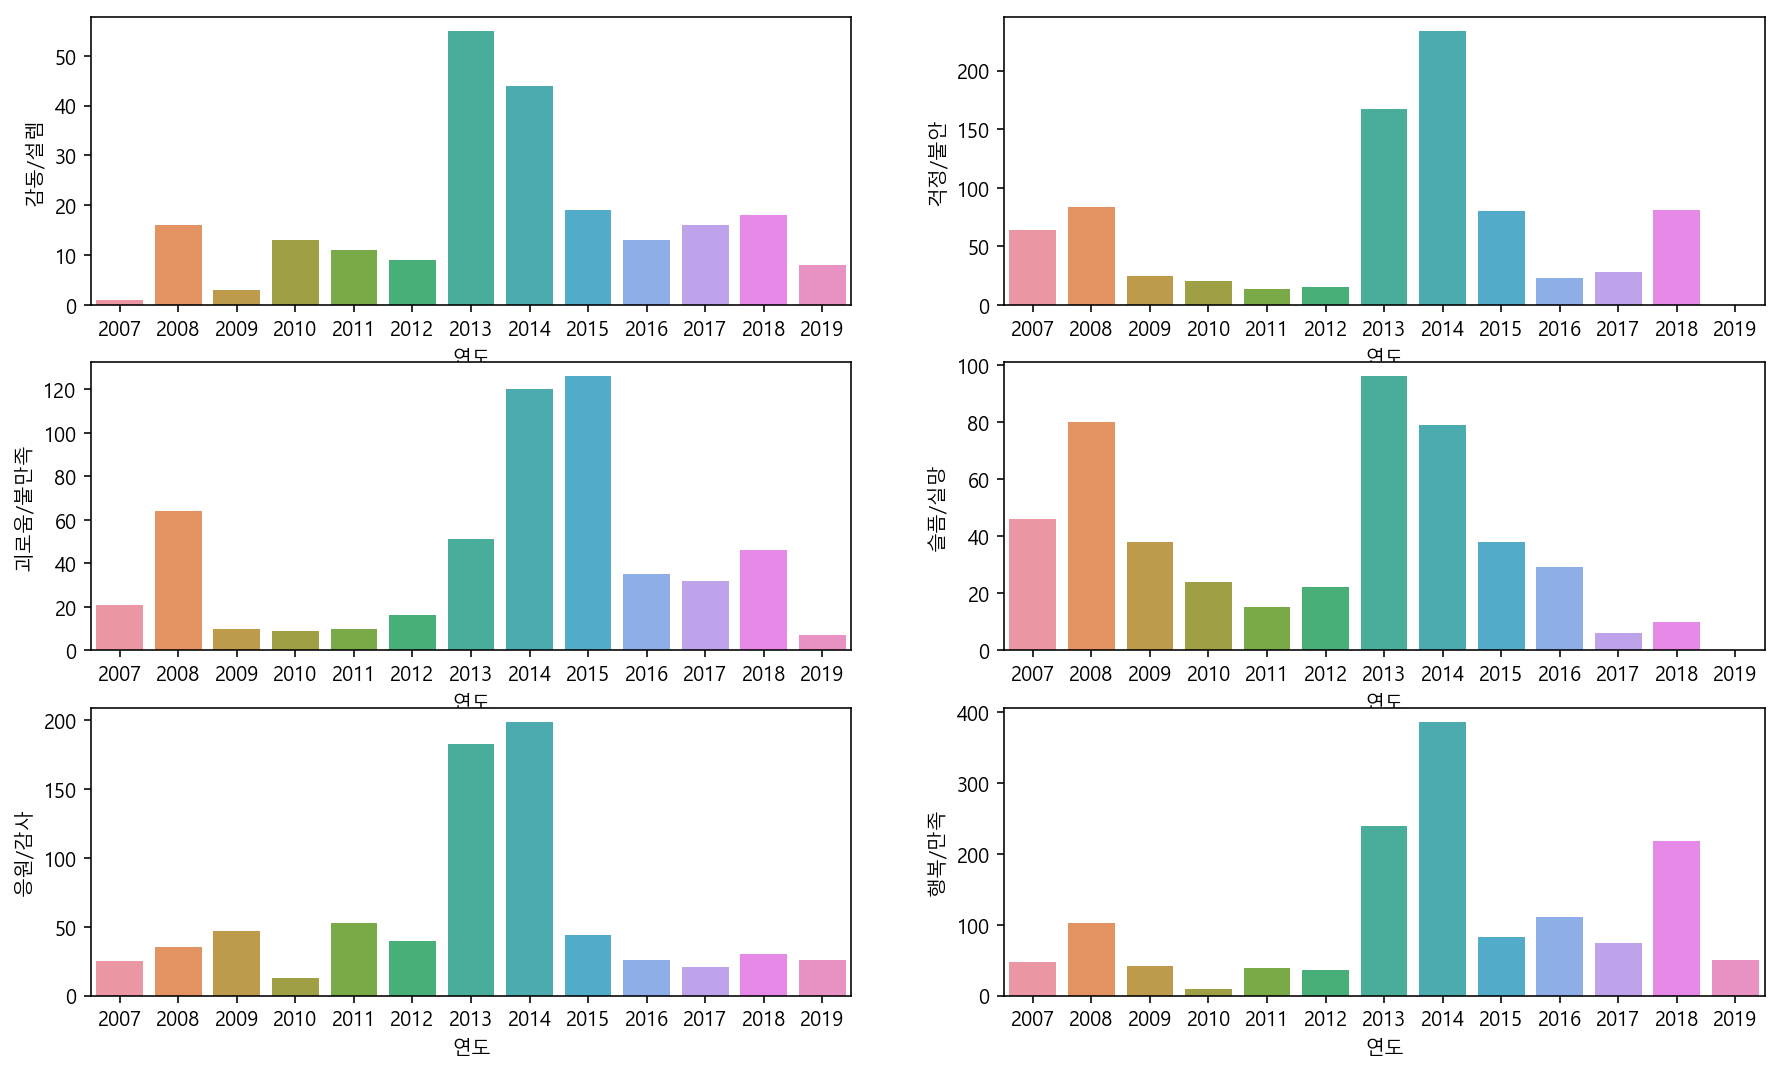

In [36]:
plt.rcParams['axes.facecolor'] = 'white'

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2) # 3행 2열의 형태로 그래프가 나오게 셋업

figure.set_size_inches(15,9) # 그래프 사이즈 조정 (여러개의 그래프를 만들 때) 

sns.barplot(data=repivot_emotion, x=repivot_emotion.index, y='감동/설렘', ax=ax1)

sns.barplot(data=repivot_emotion, x=repivot_emotion.index, y='걱정/불안', ax=ax2)

sns.barplot(data=repivot_emotion, x=repivot_emotion.index, y='괴로움/불만족', ax=ax3)

sns.barplot(data=repivot_emotion, x=repivot_emotion.index, y='슬픔/실망', ax=ax4)

sns.barplot(data=repivot_emotion, x=repivot_emotion.index, y='응원/감사', ax=ax5)

sns.barplot(data=repivot_emotion, x=repivot_emotion.index, y='행복/만족', ax=ax6)

### 7. 감정별 총 기록수

1) 총 기록수를 나타내는 '합계' 행을 만든다.

In [37]:
repivot_emotion.loc['합계',:] = repivot_emotion.sum(axis=0)
repivot_emotion

,감동/설렘,걱정/불안,괴로움/불만족,슬픔/실망,욕망,응원/감사,행복/만족
연도,,,,,,,
2007,1.0,64.0,21.0,46.0,45.0,25.0,47.0
2008,16.0,84.0,64.0,80.0,64.0,35.0,102.0
2009,3.0,25.0,10.0,38.0,5.0,47.0,42.0
2010,13.0,20.0,9.0,24.0,10.0,13.0,10.0
2011,11.0,14.0,10.0,15.0,21.0,53.0,39.0
2012,9.0,15.0,16.0,22.0,33.0,40.0,36.0
2013,55.0,167.0,51.0,96.0,69.0,183.0,240.0
2014,44.0,234.0,120.0,79.0,159.0,199.0,387.0
2015,19.0,80.0,126.0,38.0,44.0,44.0,83.0


2) 테이블을 뒤집는다.

In [38]:
df = repivot_emotion.T
df

연도,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,합계
감동/설렘,1.0,16.0,3.0,13.0,11.0,9.0,55.0,44.0,19.0,13.0,16.0,18.0,8.0,226.0
걱정/불안,64.0,84.0,25.0,20.0,14.0,15.0,167.0,234.0,80.0,23.0,28.0,81.0,0.0,835.0
괴로움/불만족,21.0,64.0,10.0,9.0,10.0,16.0,51.0,120.0,126.0,35.0,32.0,46.0,7.0,547.0
슬픔/실망,46.0,80.0,38.0,24.0,15.0,22.0,96.0,79.0,38.0,29.0,6.0,10.0,0.0,483.0
욕망,45.0,64.0,5.0,10.0,21.0,33.0,69.0,159.0,44.0,7.0,18.0,17.0,6.0,498.0
응원/감사,25.0,35.0,47.0,13.0,53.0,40.0,183.0,199.0,44.0,26.0,21.0,30.0,26.0,742.0
행복/만족,47.0,102.0,42.0,10.0,39.0,36.0,240.0,387.0,83.0,111.0,74.0,218.0,50.0,1439.0


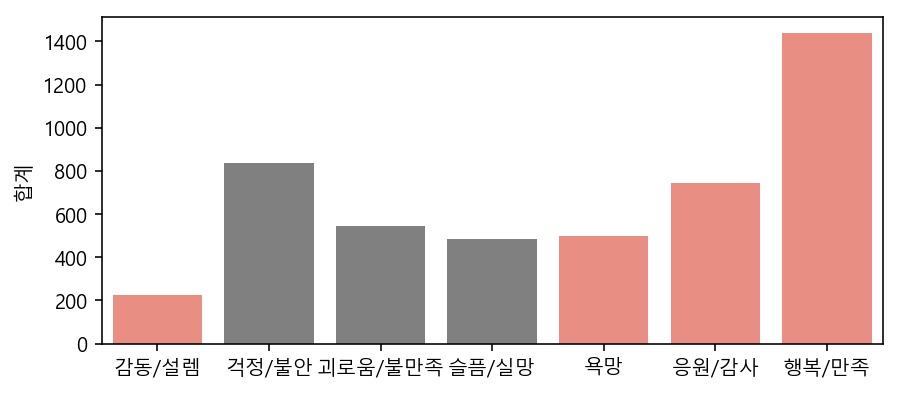

In [41]:
plt.figure(figsize=(7,3)) # 그래프 사이즈 조정 (하나의 그래프 만들때)

sns.barplot(data=df, x=df.index, y='합계', palette =['salmon','grey','grey','grey','salmon','salmon','salmon','salmon'])

## 감사합니다.